Osnabrück University - Computer Vision (Winter Term 2022/23) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack

# Exercise Sheet 07: Hough Transform/Fourier

## Introduction

This week's sheet should be solved and handed in before the end of **Sunday, January 8, 2023**. If you need help (and Google and other resources were not enough), feel free to use the StudIP forum. Please upload your results to your group's Stud.IP folder.

## Assignment 1: Implementing Hough transform (6 points)

In [ ]:
# Auxiliary functions for this exercise
import numpy as np
from skimage.transform import hough_line, resize

steps = lambda p,q : max(map(lambda x,y: abs(x-y), p, q))+1
coords = lambda p,q,s : tuple([np.linspace(x,y,s,dtype=np.uint16) for x,y in zip(p,q)])

def point(img, p):
    """Insert a point in the black/white image at position p
    
    Args:
        img (ndarray): Input image.
        p (tuple): Coordinate of point.
    
    Returns:
    
    """
    img[p] = 1

def line(img, p, q):
    """Insert a line from p to q in the black/white image
    
    Args:
        img (ndarray): Input image.
        p (tuple): Coordinate of start position.
        q (tuple): Coordinate of end position.
    
    Returns:
    
    """
    img[coords(p,q,steps(p,q))] = 1

def polygon(img, vertices):
    """Insert a (closed) polygon given by a list of points into the black/white image
    
    Args:
        img (ndarray): Input image.
        vertices (list): List of coordinate tuples.
    
    Returns:
    
    """
    for p, q in zip(vertices, vertices[1:]+vertices[0:1]):
        line(img,p,q)

**a)** Implement your own version of linear Hough transform and compare the results with the function `skimage.transform.hough_line`.

In [ ]:
from skimage.transform import hough_line
import matplotlib.pyplot as plt
import math
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def my_hough_line(img, angles=180):
    
    
    thetas = angles
    x, y = img.shape
    diag_len = np.ceil(np.sqrt(x * x + y * y))
    accumulator = x*math.sin(thetas)- y*math.cos(thetas) + diag_len
    
    """
    Apply linear Hough transform to the given image.
    
    Args:
        img (numpy.ndarray): The binary image to transform
        angles (int): The number of angles to consider.
    Result:
        accumulator (numpy.ndarray): The accumulator space.
    """
    # YOUR CODE HERE
    def abstract_method(self):
        raise NotImplemented
    
    return accumulator


img = np.zeros((100,100))

# You may try different paintings here:
#point(img, (10,10))
#line(img,(10,20),(70,20))
polygon(img,[(20,10),(80,50),(80,80),(30,60)])


fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(12,4))
plt.gray()

# original image
ax1.set_title('Image'); 
ax1.imshow(img, origin = 'lower')

# skimage
out, angles, d = hough_line(img)

out_resized = resize(out, (out.shape[0], out.shape[0]), anti_aliasing=True, preserve_range=True)
ax2.set_title('Hough transform (skimage)');
ax2.set_xlabel('Angles (degrees)')
ax2.set_ylabel('Distance (pixels)')
ax2.imshow(np.log(1 + out_resized), origin = 'lower', cmap='gray')
ax2.set_yticks(np.linspace(0, out.shape[0], 7))
ax2.set_yticklabels((-1 * np.linspace(d[-1], d[0], 7)).astype(int))
ax2.set_xticks(np.linspace(0, out.shape[0], 5))
ax2.set_xticklabels(np.linspace(np.rad2deg(angles[0]), np.rad2deg(angles[-1]), 5).astype(int))

# own implementation
my_out = my_hough_line(img)

my_out_resized = resize(out, (out.shape[0], out.shape[0]), anti_aliasing=True, preserve_range=True)
ax3.set_title('Hough transform (own implementation)');
ax3.set_xlabel('Angles (degrees)')
ax3.set_ylabel('Distance (pixels)')
ax3.imshow(np.log(1 + my_out_resized), origin = 'lower', cmap='gray')
ax3.set_yticks(np.linspace(0, out.shape[0], 7))
ax3.set_yticklabels((-1 * np.linspace(d[-1], d[0], 7)).astype(int))
ax3.set_xticks(np.linspace(0, out.shape[0], 5))
ax3.set_xticklabels(np.linspace(np.rad2deg(angles[0]), np.rad2deg(angles[-1]), 5).astype(int))

plt.show()

**b)** Under which conditions is (linear) Hough transform invertible? Try to implement an inverse linear Hough transform. 

You could create a line for each point in accumulator space by doing the following: Compute angle and distance of the line represented by the current point in accumulator space. Add the value of this point to all image pixels which belong to the corresponding line. Finally you could threshold the image. 

However, other solution are feasible, too.


YOUR ANSWER HERE

In [ ]:
%matplotlib inline 
from skimage.transform import hough_line
import math
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import threshold_otsu

def abstract_method(self):
        raise NotImplemented
        
def my_inverse_hough_line(accumulator, shape):
   
    """Compute an inverse Hough transform, i.e. compute the image from the accumulator space.
    
    Args:
        accumulator (numpy.ndarray)
        shape (tuple): The shape (dimensions) of the image to be created

    Result:
        img (numpy.ndarray): The image created from the accumulator space.
    """
    
    img = np.zeros(shape, np.uint64)
    x, y = shape
    thetas= np.array(np.arange(-90, 90))
    for point in range(len(accumulator)):
        for i in thetas:
            r = x*np.cos(thetas[i]) + y * np.sin(thetas[i])
            theta = thetas[i]
            img= np.array([theta, r])
            
            
    img = resize(out, (out.shape[0], out.shape[0]), anti_aliasing=True, preserve_range=True)
    
            
           
    def abstract_method(self):
        raise NotImplemented
    return img
    
    
img = np.zeros((100,100))

#point(img, (10,10))
#line(img,(10,20),(70,20))
#line(img,(20,10),(20,70))
polygon(img,[(10,30),(50,50),(10,70)])

plt.figure(figsize=(12, 4))
plt.gray()
plt.subplot(1,4,1) ; plt.title('Image'); plt.imshow(img, origin = 'lower')

out, angles, d = hough_line(img)
out_resized = resize(out, (out.shape[0], out.shape[0]), anti_aliasing=True, preserve_range=True)
ax = plt.subplot(1,4,2) ; plt.title('Hough transform (skimage)');
ax.set_title('Hough transform (skimage)');
ax.set_xlabel('Angles (degrees)')
ax.set_ylabel('Distance (pixels)')
ax.imshow(np.log(1 + out_resized), origin = 'lower', cmap='gray')
ax.set_yticks(np.linspace(0, out.shape[0], 7))
ax.set_yticklabels((-1 * np.linspace(d[-1], d[0], 7)).astype(int))
ax.set_xticks(np.linspace(0, out.shape[0], 5))
ax.set_xticklabels(np.linspace(np.rad2deg(angles[0]), np.rad2deg(angles[-1]), 5).astype(int))

img2 = my_inverse_hough_line(out, img.shape)
plt.subplot(1,4,3) ; plt.title('Inverse Hough transform');
plt.imshow(img2, origin = 'lower')

thresh = threshold_otsu(img2)
binary = img2 <= thresh
plt.subplot(1,4,4) ; plt.title('threshold');
plt.imshow(binary, origin = 'lower', cmap=plt.cm.gray)

plt.show()



## Assignment 2: Circular Hough (5 points)

**a)** Explain the idea of circular Hough transform. How many dimensions does the accumulator space have and what do they represent? What practical problems do you expect when computing circular Hough transform?

In the circular Hough transform instead of all possible lines that could pass through a given edge-point represented in the Hesse normal form, you draw a circle for each radius in the accumulator space around each edge point with help of the formula   
$r^2 = (x-x_c)^2 + (y - y_c)^2$  
where $x_c$ and $y_c$ represent the center of the circle and in this case the current edge point in question and $r$ the radius. Accumulation points found this way represent centers of circles with a certain radius found in the input image.
The Accumulator space in this case has three dimensions the x- and y-coordinates of the circlecenter and the radius of the circle drawn around it. One can simplify the transform by only searching for circles with one given radius, effectively cutting the accumulator space down to two dimensions, representing the image itself.  

This can be done to combat certain practical problems like the hughe computational effort it would be to calculate for each possible radius of a circle in the image, especially with larger input images.

**b)** Now implement circular hough transform. First think how the accumulator space should be represented. You may provide an additional parameter to only look for circles of a given radius (or a range of radii). Then apply it to the image `xmas.png` to detect the balls. Mark them in the original image. (Bonus task: also detect the presents using linear Hough transform).

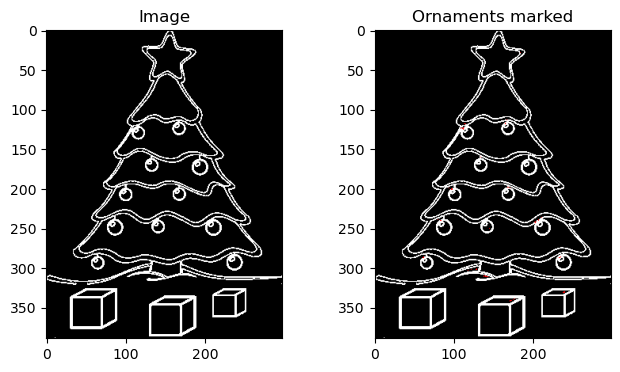

In [2]:
%matplotlib inline
from skimage.transform import hough_line
from scipy import misc
from imageio.v2 import imread
import matplotlib.pyplot as plt
import numpy as np
import cv2

# load the image
img = imread('Images/xmas.png')

def my_hough_circle(img, r):
    
    minr, maxr = r
    acc = np.zeros(img.shape)
    centers = np.zeros(img.shape)
    cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    
    for r in range(minr,maxr):
        for x in range(img.shape[0]):
            for y in range(img.shape[1]):
                if(img[x,y]):
                    for x2 in range(x-r,x+r):
                        for y2 in range(y-r,y+r):
                            if((((x2-x)**2 + (y2-y)**2) == r**2) and (0<= x2 < img.shape[0]) and (0<= y2 < img.shape[1])):
                                acc[x2,y2] += 1
        #plt.imshow(acc)
        for i in range(img.shape[0]):
            for k in range(img.shape[1]):
                if(abs(acc.max()-acc[i,k])<= 1):
                    cimg[i,k] = [255,0,0]
        
                  
    return cimg

timg = my_hough_circle(img, (5,10))

#cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)

plt.figure(figsize=(12, 4))
#plt.gray()
plt.subplot(1,3,1) ; plt.title('Image'); plt.imshow(img)

plt.subplot(1,3,2) ; plt.title('Ornaments marked'); plt.imshow(timg)


(Text(0.5, 1.0, 'Found Centers'),
 <matplotlib.image.AxesImage at 0x24a0630ca60>)

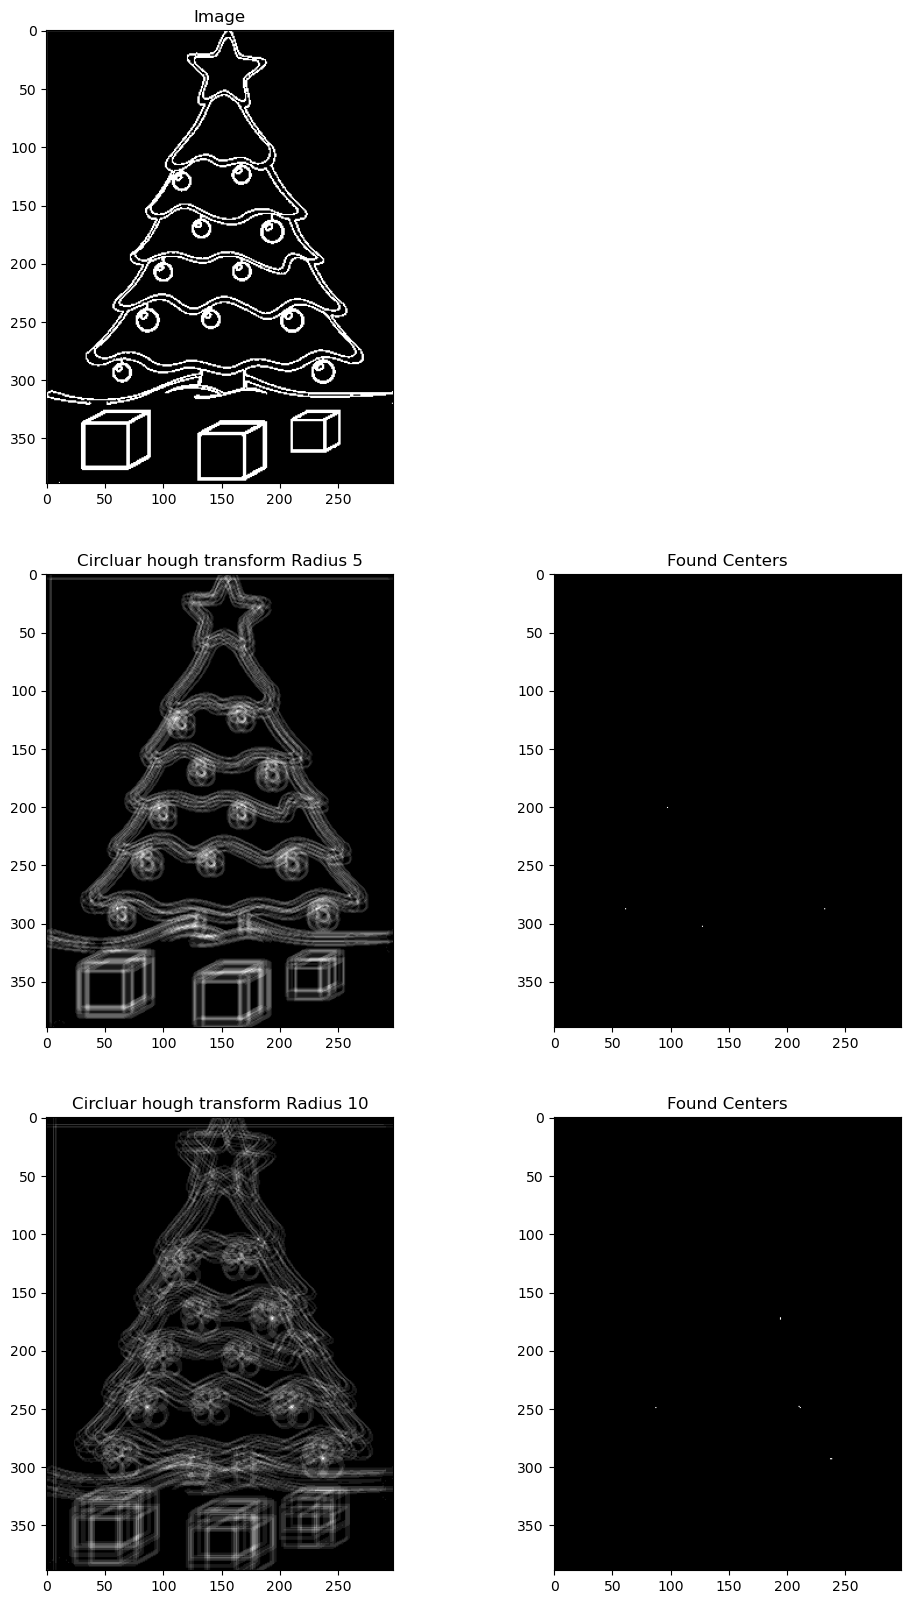

In [34]:
%matplotlib inline
from skimage.transform import hough_line
from scipy import misc
from imageio.v2 import imread
import matplotlib.pyplot as plt
import numpy as np
import cv2

# load the image
img = imread('images/xmas.png')

def my_hough_circle(img, r):
   
    acc = np.zeros(img.shape)
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            if(img[x,y]):
                for x2 in range(x-r,x+r):
                    for y2 in range(y-r,y+r):
                        if((((x2-x)**2 + (y2-y)**2) == r**2) and (0<= x2 < img.shape[0]) and (0<= y2 < img.shape[1])):
                            acc[x2,y2] += 1
                            
    return acc

timg1 = my_hough_circle(img, 5)
timg2 = my_hough_circle(img, 10)

plt.figure(figsize=(12, 20))

plt.subplot(3,2,1) ; plt.title('Image'); plt.imshow(img)

plt.subplot(3,2,3) ; plt.title('Circluar hough transform Radius 5'); plt.imshow(timg1)

plt.subplot(3,2,4) ; plt.title('Found Centers'), plt.imshow(timg1 == timg1.max())

plt.subplot(3,2,5) ; plt.title('Circluar hough transform Radius 10'); plt.imshow(timg2)

plt.subplot(3,2,6) ; plt.title('Found Centers'), plt.imshow(timg2 == timg2.max())

## Assignment 3: Application: Eye detection (5 points)

**a)** It was suggested in the lecture, that circular Hough transform can be used to implement a simple
form of “eye tracking”. Try this using your webcam.

Hints:
* You may start with a single snapshot (or some other image of a face from wherever you like) before applying your function to a video stream.
* You may start using functions like `hough_circle` from `skimage.transform`, which implement circular Hough transform.
* You may try to apply some preprocessing to detect edges or regions prior to Hough transform (you may use anything you know from the lecture).
* `hough_circle` may be inappropriate, as it is designed to detect full circles, while eyes are often partially occluded. You may implement your own Hough transforms, which detects this kind of incomplete circles.
* You may apply additional knowledge to detect eyes, e.g. that they usually occur in pairs. You may also use the approximate size and position from last frame.

In [ ]:
# imageio
%matplotlib notebook
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import imageio
import numpy as np
from skimage.filters import gaussian
from skimage.feature import canny
from skimage.color import rgb2gray
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.draw import circle_perimeter

    
def detect_eyes(img):
    """Find and mark eyes in image.
    
    Args:
        img (ndarray): The RGB input image to detect the eyes in. shape=(h, w, 3)
        
    Returns:
        ndarray: The image with detected eyes highlighted.
    
    """
    # YOUR CODE HERE
    raise NotImplementedError()

# aquire some image a img
# YOUR CODE HERE
raise NotImplementedError()

# display eyes detected in that image
plt.figure()
plt.imshow(detect_eyes(img))
plt.show()

In [ ]:
# Accessing the webcam with imageio
import imageio.v2 as imageio

try:
    display(HTML("press <kbd>I</kbd>, <kbd>I</kbd> (Kernel Interrupt) to stop the demo!"))
    with imageio.get_reader('<video0>') as webcam:
        fig = plt.figure(figsize=(8,6))
        mpl_image = plt.imshow(webcam.get_next_data())

        while True:
            img = webcam.get_next_data()
            mpl_image.set_data(detect_eyes(img))
            fig.canvas.draw()
except KeyboardInterrupt:
    print("Interrupted")
finally:
    webcam.close()
    plt.close(fig)
    print("Camera was closed.")

In [ ]:
# Accessing the webcam with OpenCV
import cv2

try:
    display(HTML("press <kbd>I</kbd>, <kbd>I</kbd> (Kernel Interrupt) to stop the demo!"))
    webcam = cv2.VideoCapture(0)
    success, frame_bgr = webcam.read()
    if not success:
        raise RuntimeError("Error accessing webcam")
    fig = plt.figure(figsize=(8,6))
    mpl_image = plt.imshow(cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB))

    while True:
        success, frame_bgr = webcam.read()
        if not success:
            raise RuntimeError("Error accessing webcam")
        img = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
        mpl_image.set_data(detect_eyes(img))
        fig.canvas.draw()
        
except KeyboardInterrupt:
    print("Interrupted")
finally:
    webcam.release()
    plt.close(fig)
    print("Camera was closed.")

## Assignment 4: Fourier Transform Basics (4 points)

**(a)** There are several "versions" of Fourier transform mentioned on the lecture slides:
* transformation of periodic function vs. aperiodic functions
* transformation of continuous vs. discrete functions
* real vs. complex basis functions
* different scaling factor 
* 1D and 2D transformation

How do these different versions affect the formula for Fourier transform? What version of Fourier transform is relevant in the context of Computer Vision?

**(b)** The basis function for Fourier transform in Computer Vision can be considered as images. How do they look like? How many such basis images exist? Provide code to plot basis images for an image of shape `(100, 100)`.




If only one pixel in the image is 1-pixel and the others are 0-pixel, the image is basis image. So we can count it with the number of pixel. M * N image will have M * N basis images.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

shape = (100,100)
# YOUR CODE HERE
count = 0
for i in range(shape[0]) :
    for j in range(shape[1]) :
        count += 1